In [1]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import math
from random import random
import statistics
%matplotlib inline

## Figure 1

### Achiral Particles (1: (c) - (f))

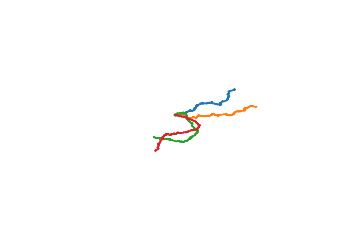

In [2]:
#Finite Difference Method
#Figure 1 (c) to (f)
#Non Chiral Particles - [omega = 0]

kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*(math.pi)*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*(math.pi)*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = 0                                       #angular velocity [rad/sec]
v = 3*10**(-6)                                  #speed [m/s] 
#Specifying the value of 'v' as 0, 1, 2 and 3 μm/s will yield figures 1-(c) to (f) respectively

t0 = 1
tf = 10
dt = 0.01
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)




for j in range(4):
    
    theta = []
    x = []
    y = []
    theta0 = 0
    x0 = 0
    y0 = 0
    for i in range(n):
        temp_theta = theta0 + omega *dt + math.sqrt(2 * DR * dt)*np.random.randn()
        temp_x = x0 + v*math.cos(theta0)*dt + math.sqrt(2 * DT * dt)*np.random.randn()
        temp_y = y0 + v*math.sin(theta0)*dt + math.sqrt(2 * DT * dt)*np.random.randn()
    
        theta.append(temp_theta)
        x.append(temp_x)
        y.append(temp_y)
    
        theta0 = temp_theta
        x0 = temp_x
        y0 = temp_y
        
    plt.plot(x,y)

plt.xlim([-0.00005,0.00005])
plt.ylim([-0.00005,0.00005])
plt.axis('off')
plt.show()   



### Chiral Particles (1: (g) and (h))

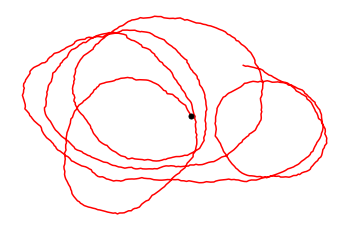

In [3]:
#Finite Difference Method
#Figure 1 (g) and (h)
#Chiral Particles - [omega = +3.14 or -3.14]

kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*math.pi*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*math.pi*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = -3.14                                       #angular velocity [rad/sec]
#Specifying the values of omega as +3.14 and -3.14 will yield figures 1-(g) and (h)
v = 31*10**(-6)                                  #speed [m/s] 

t0 = -5
tf = 5
dt = 0.01
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)

theta0 = 0
x0 = 0
y0 = 0

theta = []
x = []
y = []

for i in range(n):
        temp_theta = theta0 + omega *dt + math.sqrt(2 * DR *dt)*np.random.randn()
        temp_x = x0 + v*math.cos(theta0)*dt + math.sqrt(2 * DT *dt)*np.random.randn()
        temp_y = y0 + v*math.sin(theta0)*dt + math.sqrt(2 * DT *dt)*np.random.randn()
    
        theta.append(temp_theta)
        x.append(temp_x)
        y.append(temp_y)
    
        theta0 = temp_theta
        x0 = temp_x
        y0 = temp_y

plt.plot(x,y,'red')
plt.plot(x[len(x)-1], y[len(y)-1],'black',marker=".", markersize=10) # end point
# plt.xlim([-0.00001,0.00001])
# plt.ylim([-0.005, 0.005])
plt.axis('off')
plt.show()   




## Figure 2

### Numerical Calculation of MSD (2-(a) )

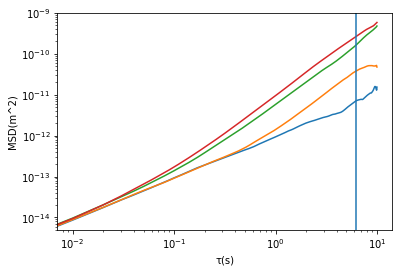

In [4]:
#Numerical Calculation
kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*math.pi*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*math.pi*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = 0                                       #angular velocity [rad/sec]
#Specifying the values of omega as +3.14 and -3.14 will yield figures 1-(g) and (h)
v =[0*10**(-6), 1*10**(-6), 2*10**(-6), 3*10**(-6)]  #speed [m/s] 

t0 = 0
tf = 10
dt = 0.01
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)

for z in v:
    theta0 = 0 
    x0 = 0
    y0 = 0

    theta = []
    x = []
    y = []
    


    for i in range(n):
        temp_theta = theta0 + omega * dt + math.sqrt(2 * DR  * dt)*np.random.randn()
        temp_x = x0 + z*math.cos(theta0)*dt + math.sqrt(2 * DT *dt)*np.random.randn()
        temp_y = y0 + z*math.sin(theta0)*dt + math.sqrt(2 * DT *dt)*np.random.randn()
    
        theta.append(temp_theta)
        x.append(temp_x)
        y.append(temp_y)
    
        theta0 = temp_theta
        x0 = temp_x
        y0 = temp_y
        
    avg=[]    
    for tau in range(0,n):
        sum = 0
        l=[]
        for k in range (n-tau):
            temp = (x[tau+k]-x[k])**2 + (y[tau+k]-y[k])**2
            l.append(temp)
        average = np.mean(l)
        avg.append(average)
            
            
    plt.loglog(t,avg,basex =10)
plt.axvline(x=6.25)
plt.xlabel('τ(s)')
plt.ylabel('MSD(m^2)')
plt.show()


### Theoretical Calculation of MSD (2-(b))

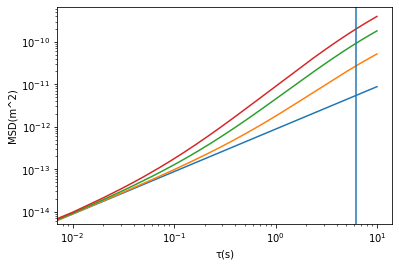

In [5]:
#Theoretical value
v =[0*10**(-6), 1*10**(-6), 2*10**(-6), 3*10**(-6)]  #speed [m/s] 

TR=1/DR

for z in v:
    msd=[]
    for i in range (n):
        temp_msd = (4*DT + (z**2)*TR)*i*dt + (z**2)*(TR**2)*(math.exp(-2*i*dt/TR) - 1)/2
        msd.append(temp_msd)
        temp_msd=0
    plt.loglog(t,msd, basex = 10)
    
plt.axvline(x=6.25)

plt.xlabel('τ(s)')
plt.ylabel('MSD(m^2)')    
plt.show()
    


## Figure 4

### Implementing Reflective Boundary Conditions

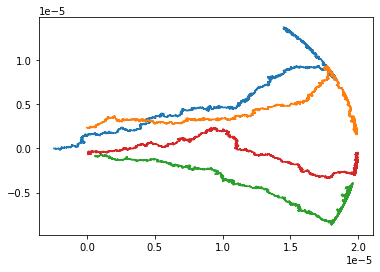

In [6]:
kB = 1.38*(10**(-23))                           #Boltzmann constant [J/K] 
T = 300                                         #Temperature [K]
eta = 0.001                                     #Fluid Viscosity [N s/m^2]
R = 1 *10**(-6)                                 #Radius of the particle [m]
DT = (kB*T)/(6*(math.pi)*eta*R)                   #Translational Diffusion Coefficient [m^2/s]
DR = (kB*T)/(8*(math.pi)*eta*R**(3))              #Rotational Diffusion Coefficient [rad^2/s]
omega = 0                                       #angular velocity [rad/sec]
v = 5*10**(-6)   
#Specifying the value of 'v' as 0, 5 and 10 μm/s will yield figures 3 a), b) and c) respectively

Rc = 20*10**(-6)                  #radius of the circle in which the particle to be confined



t0 = 0
tf = 10
dt = 0.001
t = np.arange(t0,tf,dt)
n = int((tf-t0)/dt)



q = np.array([0,0])

x_all=[]
y_all=[]

for j in range(4):
    theta0 = np.random.randn()*10**(-6)
    x0 = np.random.randn()*10**(-6)
    y0 = np.random.randn()*10**(-6)
    
    theta = []
    x = []
    y = []

    
    for k in range(n):
    
        temp_theta = theta0 + omega * dt + math.sqrt(2 * DR  * dt)*np.random.randn()
        temp_x = x0 + v*math.cos(theta0) * dt + math.sqrt(2 * DT *dt)*np.random.randn()
        temp_y = y0 + v*math.sin(theta0) * dt + math.sqrt(2 * DT *dt)*np.random.randn() 
        
        
        
        if((temp_x*temp_x + temp_y*temp_y) <= Rc*Rc):
            x.append(temp_x)
            y.append(temp_y)
            
            x_all.append(temp_x)
            y_all.append(temp_y)
            
            
            x0 = temp_x
            y0 = temp_y
            
        else:
            v1 = np.array([x0, y0]) #initial point
            v2 = np.array([temp_x, temp_y])     #new point
            
            v12 = v2 - v1 
            
            a = np.dot(v12,v12)
            b = 2*np.dot(v12,(v1-q))
            c = np.dot(v1,v1)+np.dot(v2,v2)-2*np.dot(v1,q)-Rc**2

            disc = b**2 - 4*a*c
            if(disc >= 0):
                alpha = np.array([(-b + math.sqrt(disc)) / (2 * a) , (-b - math.sqrt(disc)) / (2 * a)])
                p_t0 =  v1+alpha[0]*v12 ; p_t1 =  v1+alpha[1]*v12
           
                if (np.linalg.norm(v1-p_t0) < np.linalg.norm(v1-p_t1) ):
                    p_c = p_t0
                else:
                    p_c = p_t1
            
                p_1 = p_c - q 
                mag_n = np.linalg.norm(p_1)
                ncap = p_1/mag_n
                r_ref= v2 - ((v2-p_c).dot(ncap))*2*ncap

            
                x.append(r_ref[0])
                y.append(r_ref[1])
                
                x_all.append(r_ref[0])
                y_all.append(r_ref[1])
            
            
                x0 = r_ref[0]
                y0 = r_ref[1]
                
                
            
        theta0 = temp_theta
        
    
    plt.plot(x,y)

# plt.axis('off')
plt.show()    
              

### Radial Probability Distribution of Points inside the Circle

Text(0, 0.5, 'P(r)')

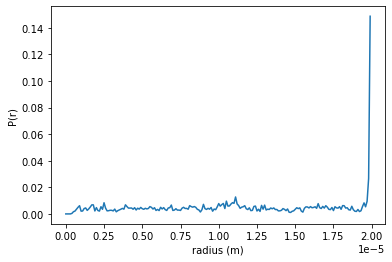

In [7]:
ri=0
rf=20*10**(-6)
dr = 0.1*10**(-6)

r_values = np.arange(ri,rf,dr)

r_range = int((rf-ri)/dr)

points = []
dis1=[]
for i in range (r_range):
    count = 0
    for k in range(len(x_all)):
        distance = math.sqrt(x_all[k]**2 + y_all[k]**2)
        
        
        if ((i-1)*dr < distance <= i*dr):
            count = count + 1
            
        
          
    points.append(count)
    
sum_list = np.sum(points)
new = points/sum_list
  
plt.plot(r_values,new) 
plt.xlabel('radius (m)')
plt.ylabel('P(r)')

